<a href="https://colab.research.google.com/github/stephenbeckr/time-series-class/blob/main/Code/VisualizeWhiteNoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing white noise (and non-white noise)

White noise means that all entries of a process $X_t$ are uncorrelated and stationary. In particular, the autocorrelation $\rho$ is
$$\rho(h)=\begin{cases}1 & h=0\\0 & h\neq 0\end{cases}.$$

For example, 
$$ X_t \sim \mathcal{N}(0,1) \quad\text{iid} $$
is $\text{WN}(0,1)$.

Suppose we have a process that is also
$$ X_t \sim \mathcal{N}(0,1)$$
but is **not** iid, and is **not** white noise.  Can we **visualize** how this would look differently?

This lab (done in Python, not R, since the math is very basic and I'm faster at plotting in Python) is designed to help you visualize these kinds of sequences.

We have
- 2D, since this makes for nice plots, then
- 1D, where we can look at our autocorrelation

Stephen Becker, Jan 2022

In [4]:
import numpy as np
import scipy.ndimage
from matplotlib import pyplot as plt

## Plot 2D noise signals

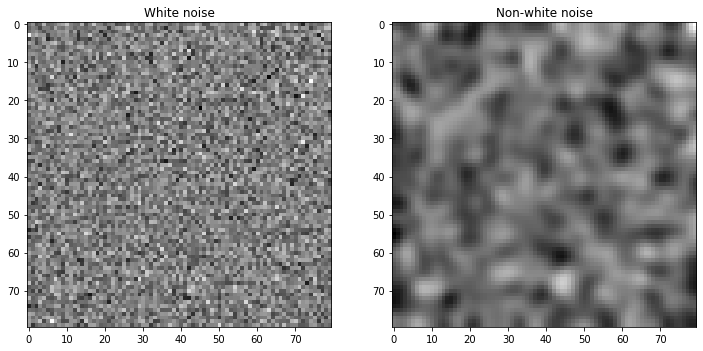

In [5]:
rng = np.random.default_rng()

n   = 80
X   = rng.standard_normal( size=(n,n) )

fig, ax = plt.subplots(figsize=(12, 25))

plt.subplot(1,2,1)
plt.imshow(X,cmap='gray')
plt.title('White noise')

sigma = 2
Y   = scipy.ndimage.gaussian_filter(X,sigma)
Y   *= np.linalg.norm(X)/np.linalg.norm(Y)
plt.subplot(1,2,2)
plt.imshow(Y,cmap='gray')
plt.title('Non-white noise')
plt.show()

#### Are these distinguishable from the first-order statistics?
e.g., looking at the distribution of $\{X_t\}$ considered in isolation?

(Not caring about correlation between $X_t$ and $X_{t+h}$)

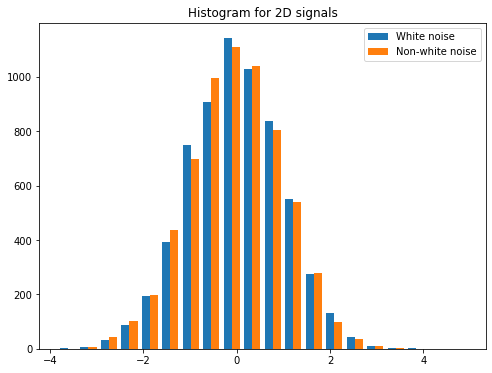

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(np.stack( (X.flatten(), Y.flatten()) ).T, 
         bins=20, label=('White noise','Non-white noise') )
plt.legend()
plt.title('Histogram for 2D signals')
plt.show()

**No**, not distinguishable

## Repeat, in 1D

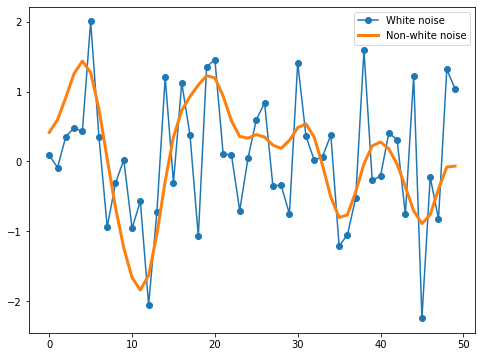

In [23]:
n   = 500
x   = rng.standard_normal( size=n )

m  = 50 # for the plot, only show some of it
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x[:m],'o-',label='White noise')
sigma = 2
y   = scipy.ndimage.gaussian_filter(x,sigma)
y   *= np.linalg.norm(x)/np.linalg.norm(y)
plt.plot(y[:m],'-',label='Non-white noise',linewidth=3)
plt.legend()
plt.show()

There's a **big** difference!

Let's look below at first-order statistics: can we see a difference?

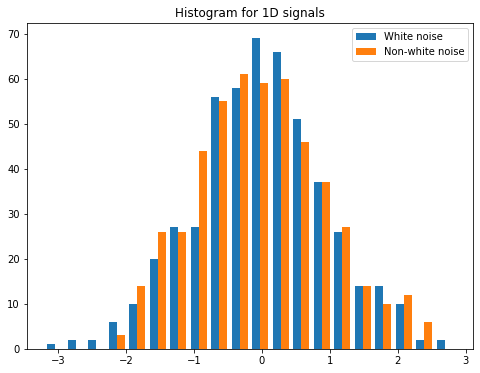

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(np.stack( (x.flatten(), y.flatten()) ).T, 
         bins=20, label=('White noise','Non-white noise') )
plt.legend()
plt.title('Histogram for 1D signals')
plt.show()

Again, **no**, the 1st order statistics look basically the same.

#### Show ACF
The Autocorrelation Function gives us a look at second-order statistics. Can we see a difference between the white and non-white noise now?

We'll use `plot_acf` from a package to do all the hard work for us.

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


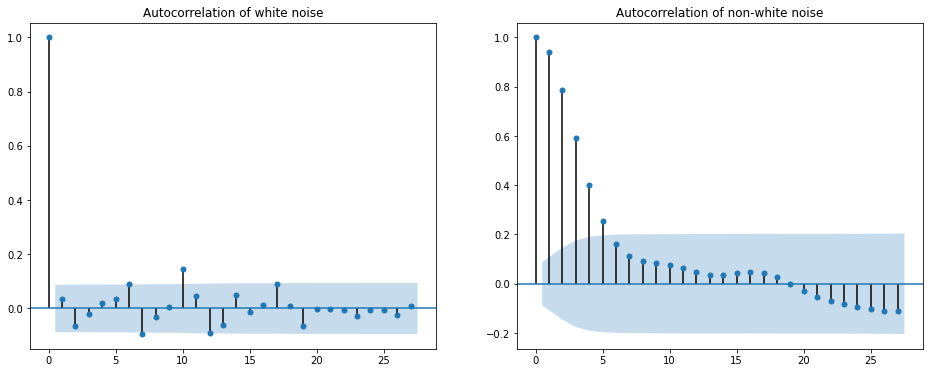

In [26]:
fig, ax = plt.subplots(figsize=(16, 6))

ax1=plt.subplot(1,2,1)
plot_acf(x,ax=ax1)
plt.title('Autocorrelation of white noise')

ax2=plt.subplot(1,2,2)
plot_acf(y,ax=ax2)
plt.title('Autocorrelation of non-white noise')
plt.show()